## Title: Diabetes Health Indicators Analysis  
#### Author: HASEEB Sheikh Muhammad  
#### SID: 58791350  

### Module 1: Data Exploration  
Step 1: Load the Dataset  
Step 2: View Dataset  
Step 3: Understand the dataset  
Step 4: Find erroneous/missing values  
Step 5: Handle missing values, (remvoval/imputation/mean/etc.)

In [2]:
# Import Libraries to work with data
import numpy as np
import pandas as pd

In [3]:
# Load the dataset
df = pd.read_csv("Diabetes.csv")
# Preview the data set, understand how many rows and columns it has
print(df.shape)
df.head()

(5000, 24)


,patient_id,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,...,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,insulin_level,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,1,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215.0,...,30.5,0.89,134.0,78,68,239,6.36,29.6,Type 2,1
1,2,48,Female,White,Highschool,Middle,Employed,Former,1,143.0,...,23.1,0.80,129.0,76,67,116,2.00,23.0,No Diabetes,0
2,3,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57.0,...,22.2,0.81,115.0,73,74,213,5.07,44.7,Type 2,1
3,4,74,Female,Black,Highschool,Low,Retired,Never,0,49.0,...,26.8,0.88,120.0,93,68,171,5.28,38.2,Type 2,1
4,5,46,Male,White,Graduate,Middle,Retired,Never,1,109.0,...,21.2,0.78,92.0,67,67,210,12.74,23.5,Type 2,1


In [4]:
# View information about the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   patient_id                          5000 non-null   int64  
 1   age                                 5000 non-null   int64  
 2   gender                              4999 non-null   object 
 3   ethnicity                           5000 non-null   object 
 4   education_level                     5000 non-null   object 
 5   income_level                        5000 non-null   object 
 6   employment_status                   5000 non-null   object 
 7   smoking_status                      4999 non-null   object 
 8   alcohol_consumption_per_week        5000 non-null   int64  
 9   physical_activity_minutes_per_week  4999 non-null   float64
 10  diet_score                          5000 non-null   float64
 11  sleep_hours_per_day                 4999 no

In [5]:
# Check how many null or duplicated values
print("Missing Values:\n", df.isnull().sum()) # This prints null values by column
print("Total Missing Value: ", df.isnull().sum().sum(),'\n') # This will show how many null values we have in total
print("Duplicate Values: ",df.duplicated().sum())



Missing Values:
 patient_id                            0
age                                   0
gender                                1
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        1
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    1
diet_score                            0
sleep_hours_per_day                   1
screen_time_hours_per_day             0
family_history_diabetes               1
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           1
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
insulin_level                         0
diabetes_risk_score                   0
diabetes_stage                        2
diagnosed_diabetes                    0
dtype: int64
Total Miss

## Handling the missing values
Since we have just 8 null values out of 5000 records and 0 duplicates, it is safe to simply drop these records without much affect on our analysis

In [6]:
print("Original dataset: ",df.shape)
removed = df.shape[0]
df = df.dropna()
removed -= df.shape[0]
print("New dataset: ", df.shape)
print("Removed ", removed, " records with missing value." )

Original dataset:  (5000, 24)
New dataset:  (4992, 24)
Removed  8  records with missing value.


Divide up the columns based on what type of data they store for easier analysis, e.g. for outliers will be using only numerical data so will be easier

In [7]:
# Divide the columns into what type of data they store which we can see from df.head or df.info
numCols = ['age','alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day','screen_time_hours_per_day',
           'bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate','cholesterol_total','insulin_level','diabetes_risk_score']
# Above are all the columns that store numerical data, note binary data is not really numerical data therefore not included numCols is short for numerical_columns
binCols = ['family_history_diabetes', 'diagnosed_diabetes'] # Binary Columns, either 0 or 1
ordCols = ['education_level', 'income_level', 'diabetes_stage'] # Ordinal Columns
nomCols = ['gender', 'ethnicity', 'employment_status', 'smoking_status'] # Nominal Columns

## Handling Erroneous values
We will be checking to see if all the values are as expected or not, especially for ordinal and nominal data

In [8]:
# Get all categorical columns
catCols = ordCols + nomCols + binCols
# See unique values in each column
print("Unique values in each categorical column:\n")
for col in catCols:
    uniques = sorted(df[col].unique())
    print(f"{col:25} → {uniques}")
# We found some errors in the data therefore need to see how many records each value has to see how to fix the error
for col in catCols:
    print(f"\n{col.upper()}")
    print(df[col].value_counts().sort_index())

Unique values in each categorical column:

education_level           → ['Graduate', 'Highschool', 'No formal', 'Postgraduate', 'University']
income_level              → ['High', 'Low', 'Lower-Middle', 'Middle', 'Upper-Middle']
diabetes_stage            → ['Gestational', 'No Diabetes', 'Pre-Diabetes', 'Type 1', 'Type 2', 'Type 22', 'Type3']
gender                    → ['Female', 'Male', 'Other']
ethnicity                 → ['Asian', 'Black', 'Hispanic', 'Other', 'White']
employment_status         → ['Employed', 'Retired', 'Student', 'Unemployed']
smoking_status            → ['Current', 'Former', 'Mever', 'Never']
family_history_diabetes   → [0.0, 1.0, 2.0]
diagnosed_diabetes        → [0, 1, 2]

EDUCATION_LEVEL
education_level
Graduate        1742
Highschool      2244
No formal        222
Postgraduate     783
University         1
Name: count, dtype: int64

INCOME_LEVEL
income_level
High             248
Low              756
Lower-Middle    1271
Middle          1754
Upper-Middle     963
Na

We can see that, for:  

Education Level, University only has one record, which is going to take up useful space later on, we can simply map it to Graduate, since simply University is not really a descriptive education level, and since its only 1 record, replacing it shoulndt affect our analysis a lot.  

Diabetes Stage: this has some typos, as we can see that there is a Type 22 and type3, which is not really recognised as a valid stage, both will be mapped to type 2.  

Smoking Status: This has a typo Mever, which will replace to Never.

Family History Diabetes: Only 1 record has 2, and it is only supposed to be 0 or 1, according to the dataset description given, this will be mapped to 1.  

Diagnosed Diabetes: 1 record has 2, which is also again an error, this will be mapped to 1.  

In [9]:
# Fix the typos
# Education: map 'University' to 'Graduate'
df['education_level'] = df['education_level'].replace('University', 'Graduate')

# Diabetes stage: map typos to 'Type 2'
df['diabetes_stage'] = df['diabetes_stage'].replace({'Type 22': 'Type 2', 'Type3': 'Type 2'})

# Smoking: map 'Mever' to 'Never'
df['smoking_status'] = df['smoking_status'].replace('Mever', 'Never')

# Family history: map 2 to 1
df['family_history_diabetes'] = df['family_history_diabetes'].replace(2,1)

# Diagnosed diabetes: map 2 to 1
df['diagnosed_diabetes'] = df['diagnosed_diabetes'].replace(2, 1)

# Check unique values again:
print("Unique values in each categorical column:\n")
for col in catCols:
    uniques = sorted(df[col].unique())
    print(f"{col:25} → {uniques}")

Unique values in each categorical column:

education_level           → ['Graduate', 'Highschool', 'No formal', 'Postgraduate']
income_level              → ['High', 'Low', 'Lower-Middle', 'Middle', 'Upper-Middle']
diabetes_stage            → ['Gestational', 'No Diabetes', 'Pre-Diabetes', 'Type 1', 'Type 2']
gender                    → ['Female', 'Male', 'Other']
ethnicity                 → ['Asian', 'Black', 'Hispanic', 'Other', 'White']
employment_status         → ['Employed', 'Retired', 'Student', 'Unemployed']
smoking_status            → ['Current', 'Former', 'Never']
family_history_diabetes   → [0.0, 1.0]
diagnosed_diabetes        → [0, 1]


## Handling outliers
As per the project prompt/guide, we are going to be dropping the outliers using the given criteria

In [10]:
# Check for outliers using the IQR
Q1 = df[numCols].quantile(0.25)
Q3 = df[numCols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numCols] < (Q1 - 2.5*IQR)) | (df[numCols] > (Q3 + 2.5*IQR))).any(axis=1) # This is basically applying a mask, which will be true whenver there is an outlier in a record
print("There were ", outliers.sum(), "records with outlier values in atleast 1 column.")

There were  35 records with outlier values in atleast 1 column.


In [11]:
df = df[~outliers].reset_index(drop=True) # This is going to be dropping all the records where the outliers were found 

In [12]:
# Dropping patient ids column since it is not relevant
df = df.drop(columns=['patient_id'])

In [13]:
print(df.shape)
df.head()

(4957, 23)


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,insulin_level,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215.0,5.7,...,30.5,0.89,134.0,78,68,239,6.36,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143.0,6.7,...,23.1,0.80,129.0,76,67,116,2.00,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57.0,6.4,...,22.2,0.81,115.0,73,74,213,5.07,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49.0,3.4,...,26.8,0.88,120.0,93,68,171,5.28,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109.0,7.2,...,21.2,0.78,92.0,67,67,210,12.74,23.5,Type 2,1


### Module 1 Summary (Data Cleaning)
Loaded the dataset  
The dataset had 5000 records, each with 24 columns (23 properties).  
Found 8 null values and removed them, leaving us with 4992 records.  
Found 35 outliers using IQR method, removed the outliers which were lesser than Q1 - 2.5 * IQR or greater than Q3 + 2.5 * IQR, leaving us with 4957 unique records.  
Found Typos in the dataset which were fixed by repalcing them with contextual understanding.  
We dropped the patient ids column as it was irrelevant.

## Module 2: Data Visualization
Step 1: Load the relevant libraries, like seaborn and matplotlib.pyplot etc.  
Step 2: Explore using different graphs 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

### Analyze Numeric Features first

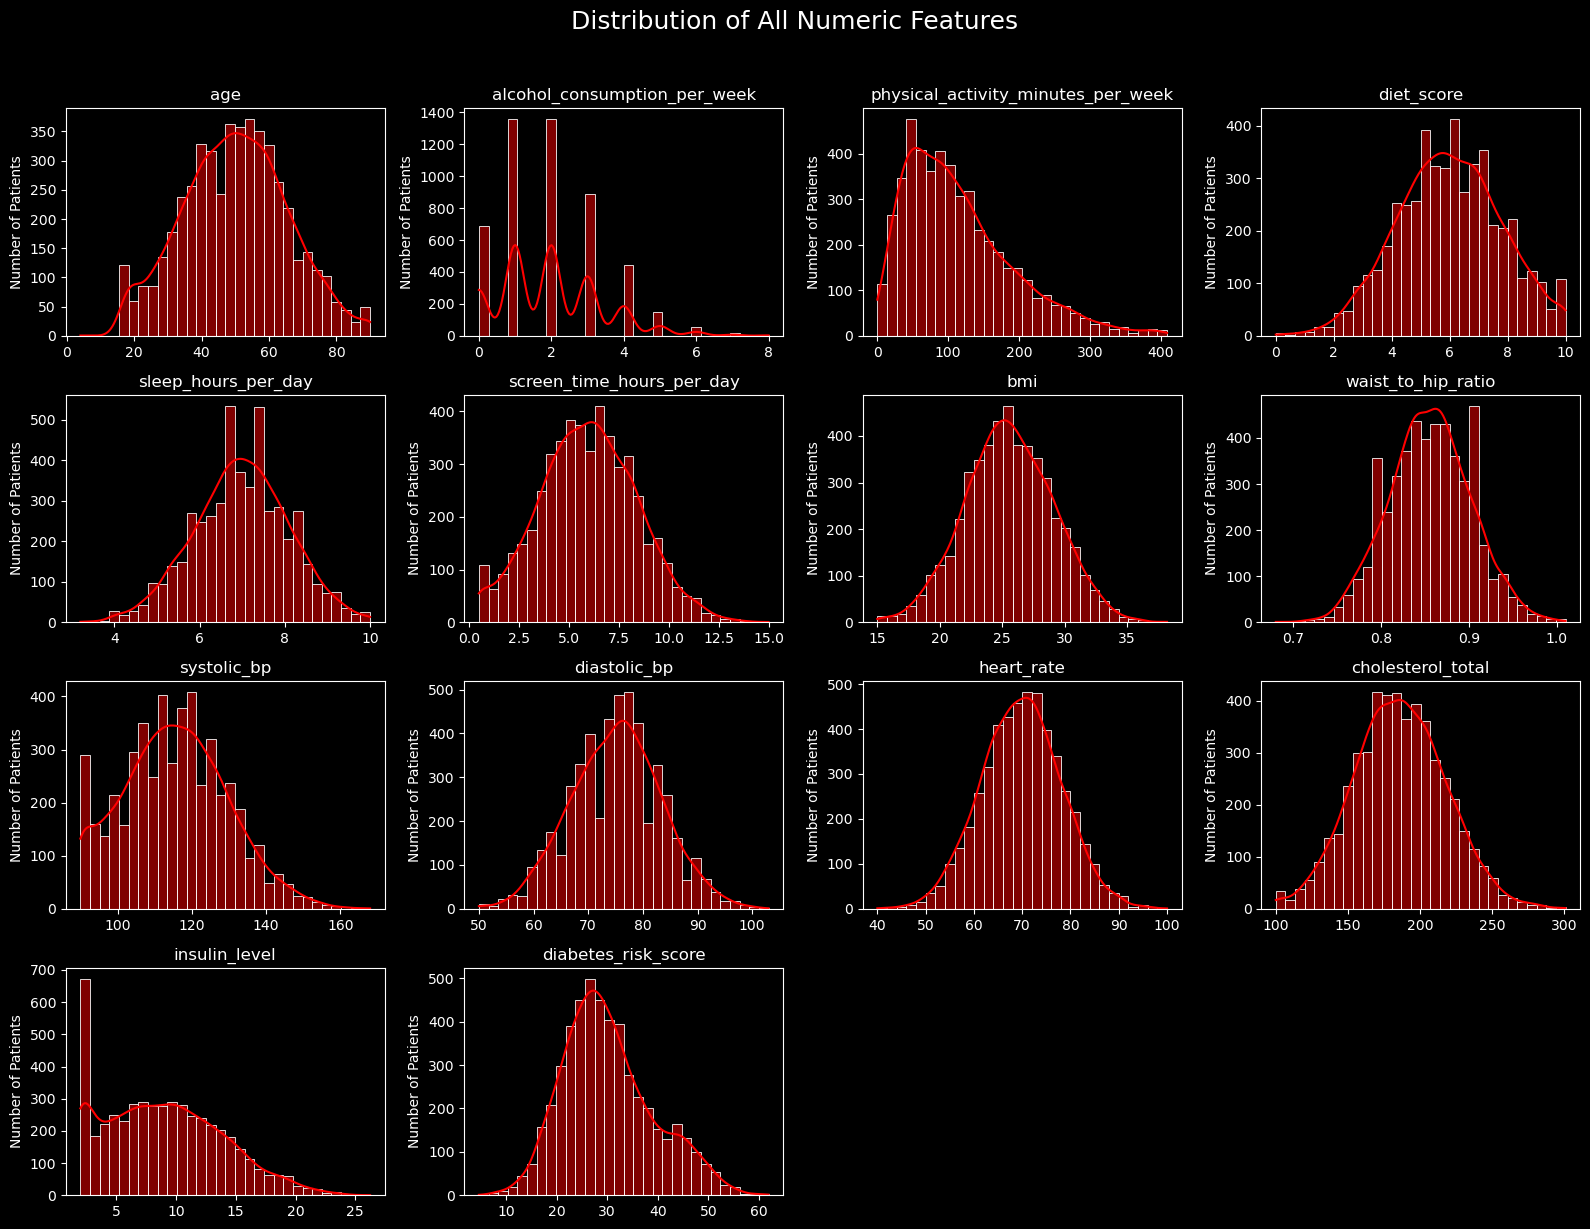

In [15]:
# Analyze numeric columns for now, see their distribution
# Reminder here is are the numeric columns which we separated earlier:
# numCols = ['age','alcohol_consumption_per_week','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day','screen_time_hours_per_day',
#            'bmi','waist_to_hip_ratio','systolic_bp','diastolic_bp','heart_rate','cholesterol_total','insulin_level','diabetes_risk_score']
plt.style.use('dark_background') # I just like dark mode, completely optional, irrelevant to analysis
sns.set_palette('husl') # Again, completely optional, i prefer this, irrelevant to analysis
plt.figure(figsize=(16, 12))
for i, col in enumerate(numCols, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(data=df, x=col, kde=True, color='red', bins=30)
    plt.title(col, fontsize=12)
    plt.xlabel('')
    plt.ylabel('Number of Patients')

plt.suptitle('Distribution of All Numeric Features', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## Description of all numeric features:
Above we plotted all 14 numerical features in a 4x4 grid to easily visualize their distributions, since some of their 'description' can be grouped together, I will describe them in groups

1. Approximately normally distributed:
'age', 'bmi' , 'heart_rate', 'sleep_hours_per_day' , 'waist_to_hip_ratio' , 'diastolic_bp' 
2. Right-Skewed:
'physical_activity_minutes_per_week' , 'screen_time_hours_per_day' , 'cholesterol_total' , 'insulin_level' , 'diabetes_risk_score'  
3. Left-Skewed:
'diet_score'

Since alcohol consumption is actually an integer instead of a float, the kde plot is not useful as it is usually for continous data, this is also why it looks a bit wobbly for diastolic data which is also an integer so we will visualize it again, without kde, and for a discrete variable we can also see that it is right-skewed.

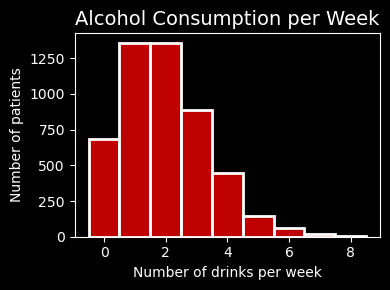

In [16]:
plt.figure(figsize=(4, 3))

sns.histplot(data=df, x='alcohol_consumption_per_week', color='red', discrete=True, bins=10, linewidth=2) # No KDE

plt.title('Alcohol Consumption per Week', fontsize=14, color='white')
plt.xlabel('Number of drinks per week', color='white')
plt.ylabel('Number of patients', color='white')
plt.tight_layout()
plt.show()

The above just provides a better visualization for the alcohol consumption.

## Categorical Features distriubtions

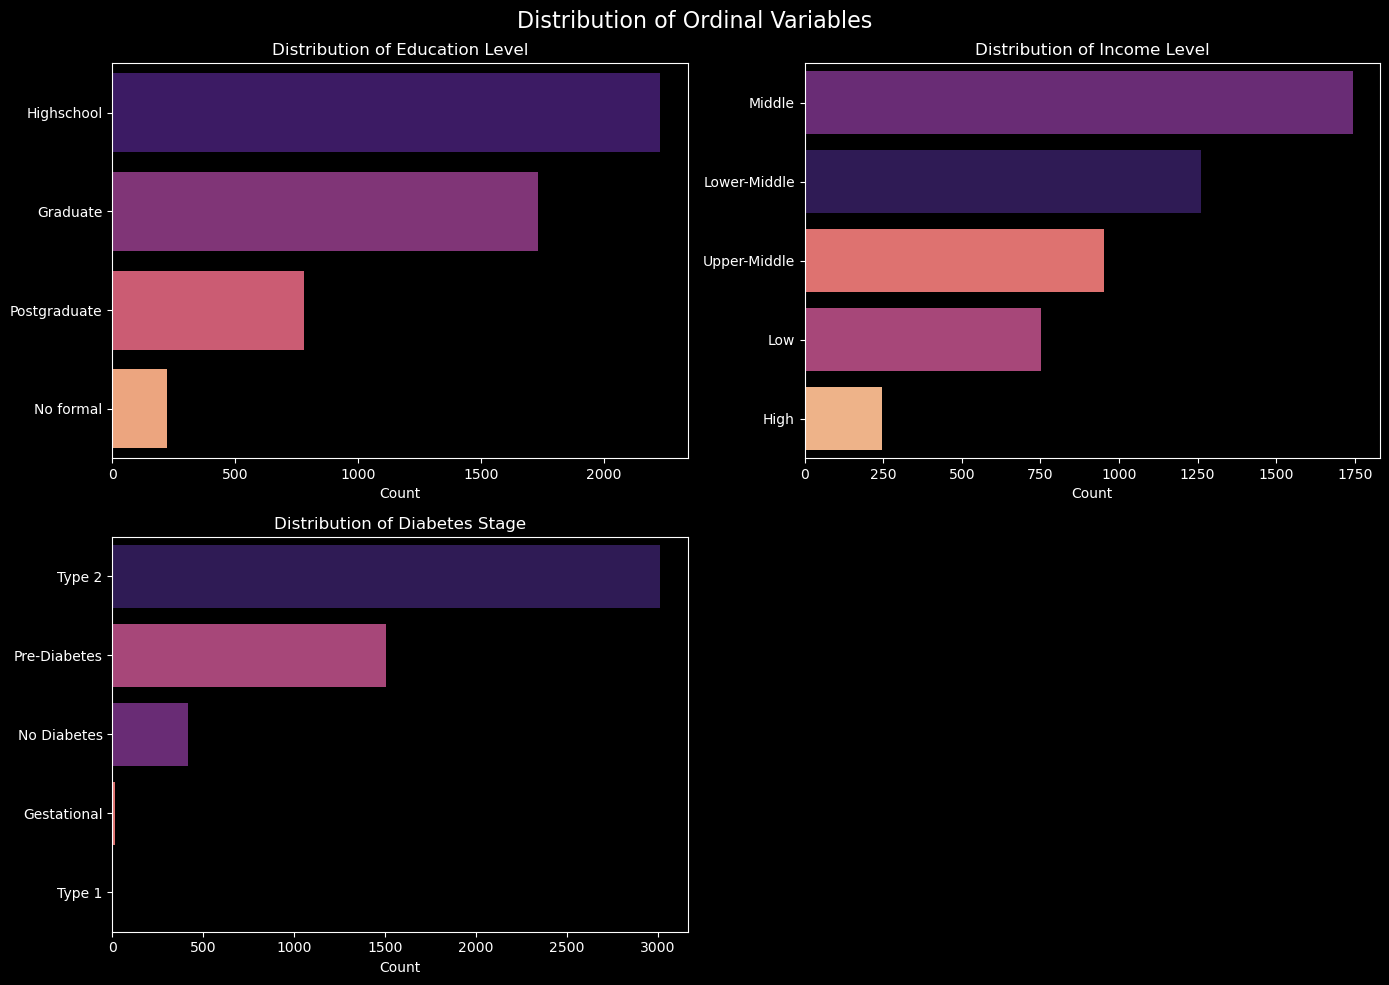

In [17]:
# Now we will analyze the ordinal, nominal, binary columns, which were also separated earlier
# For reminder here they are:
# binCols = ['family_history_diabetes', 'diagnosed_diabetes'] # Binary Columns, either 0 or 1
# ordCols = ['education_level', 'income_level', 'diabetes_stage'] # Ordinal Columns
# nomCols = ['gender', 'ethnicity', 'employment_status', 'smoking_status'] # Nominal Columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(ordCols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=col, hue=col, order=df[col].value_counts().index,
                  palette='magma', legend=False)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', 
              color='white', fontsize=12)
    plt.xlabel('Count')
    plt.ylabel('')
    
plt.suptitle('Distribution of Ordinal Variables', fontsize=16, color='white', y=0.98)
plt.tight_layout()
plt.show()

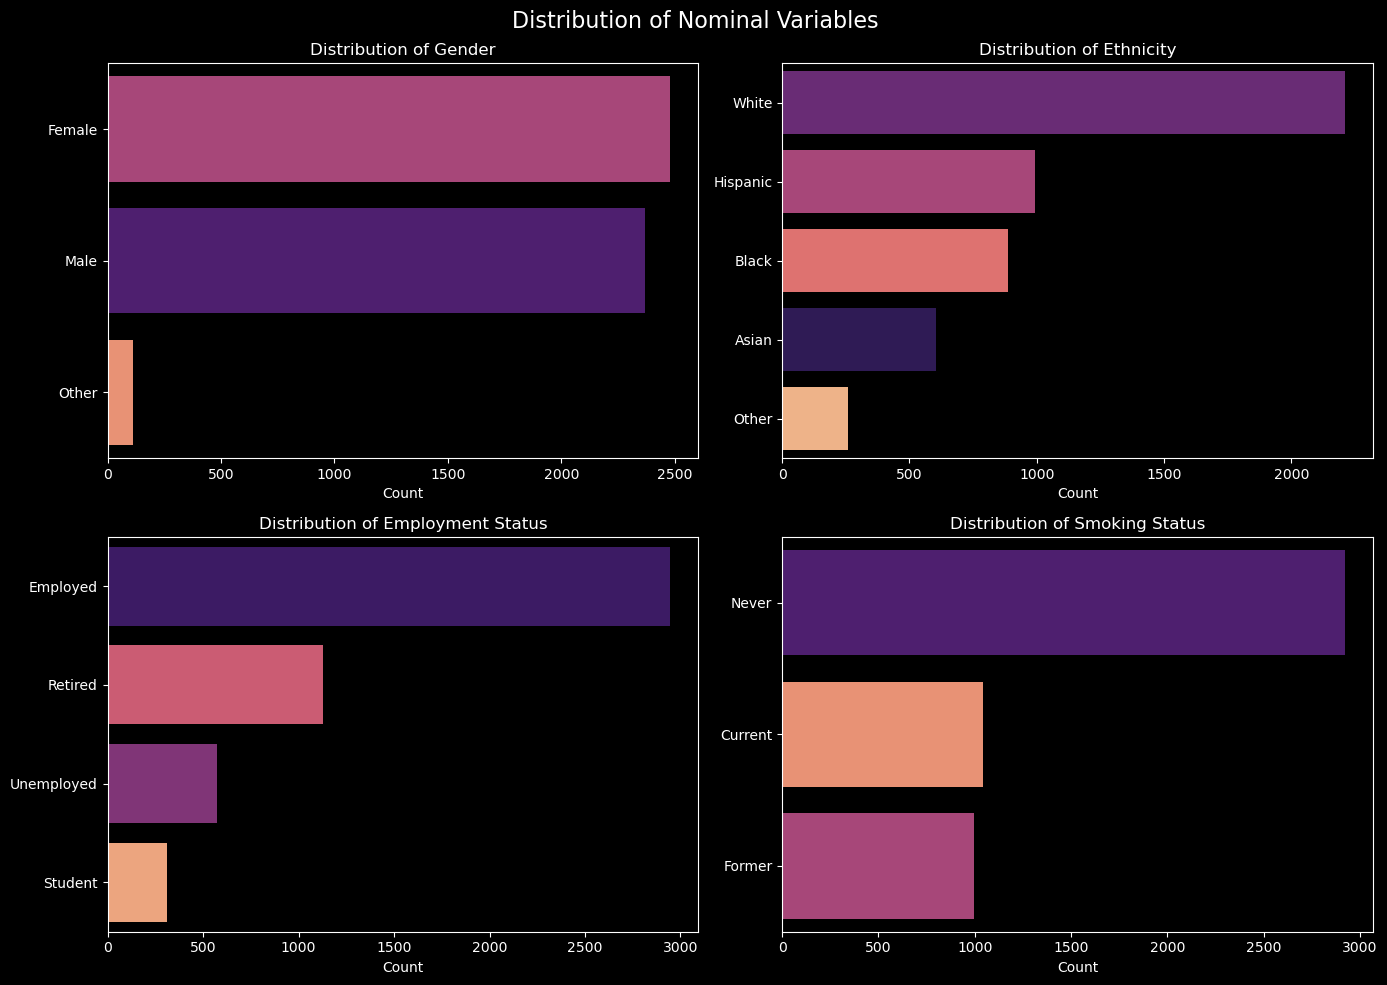

In [18]:
# Nominal Variables
plt.figure(figsize=(14, 10))
for i, col in enumerate(nomCols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, y=col, hue=col, order=df[col].value_counts().index,
                  palette='magma', legend=False)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', 
              color='white', fontsize=12)
    plt.xlabel('Count')
    plt.ylabel('')
    
plt.suptitle('Distribution of Nominal Variables', fontsize=16, color='white', y=0.98)
plt.tight_layout()
plt.show()

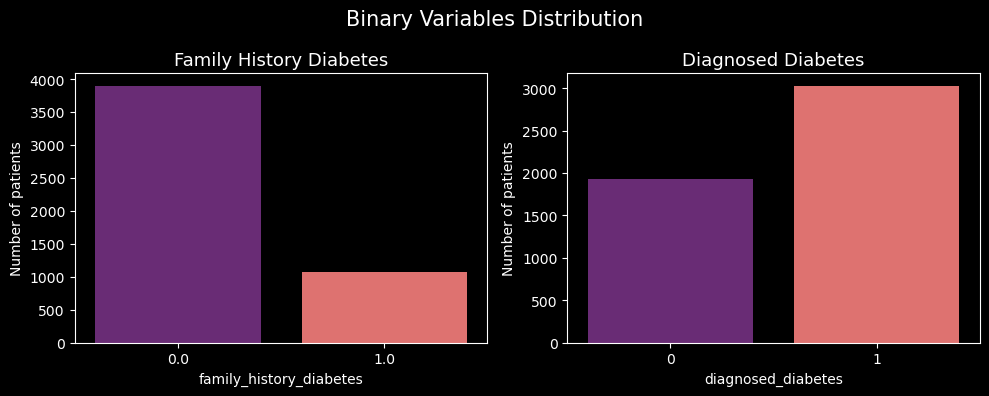

In [19]:
# Binary Variables
plt.figure(figsize=(10,4))
for i, col in enumerate(binCols, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=col, hue = col, legend=False, palette='magma')
    plt.title(col.replace('_',' ').title(), color='white', fontsize=13)
    plt.ylabel('Number of patients')
plt.suptitle('Binary Variables Distribution', color='white', fontsize=15)
plt.tight_layout()
plt.show()

Now we will look at the relationships between them

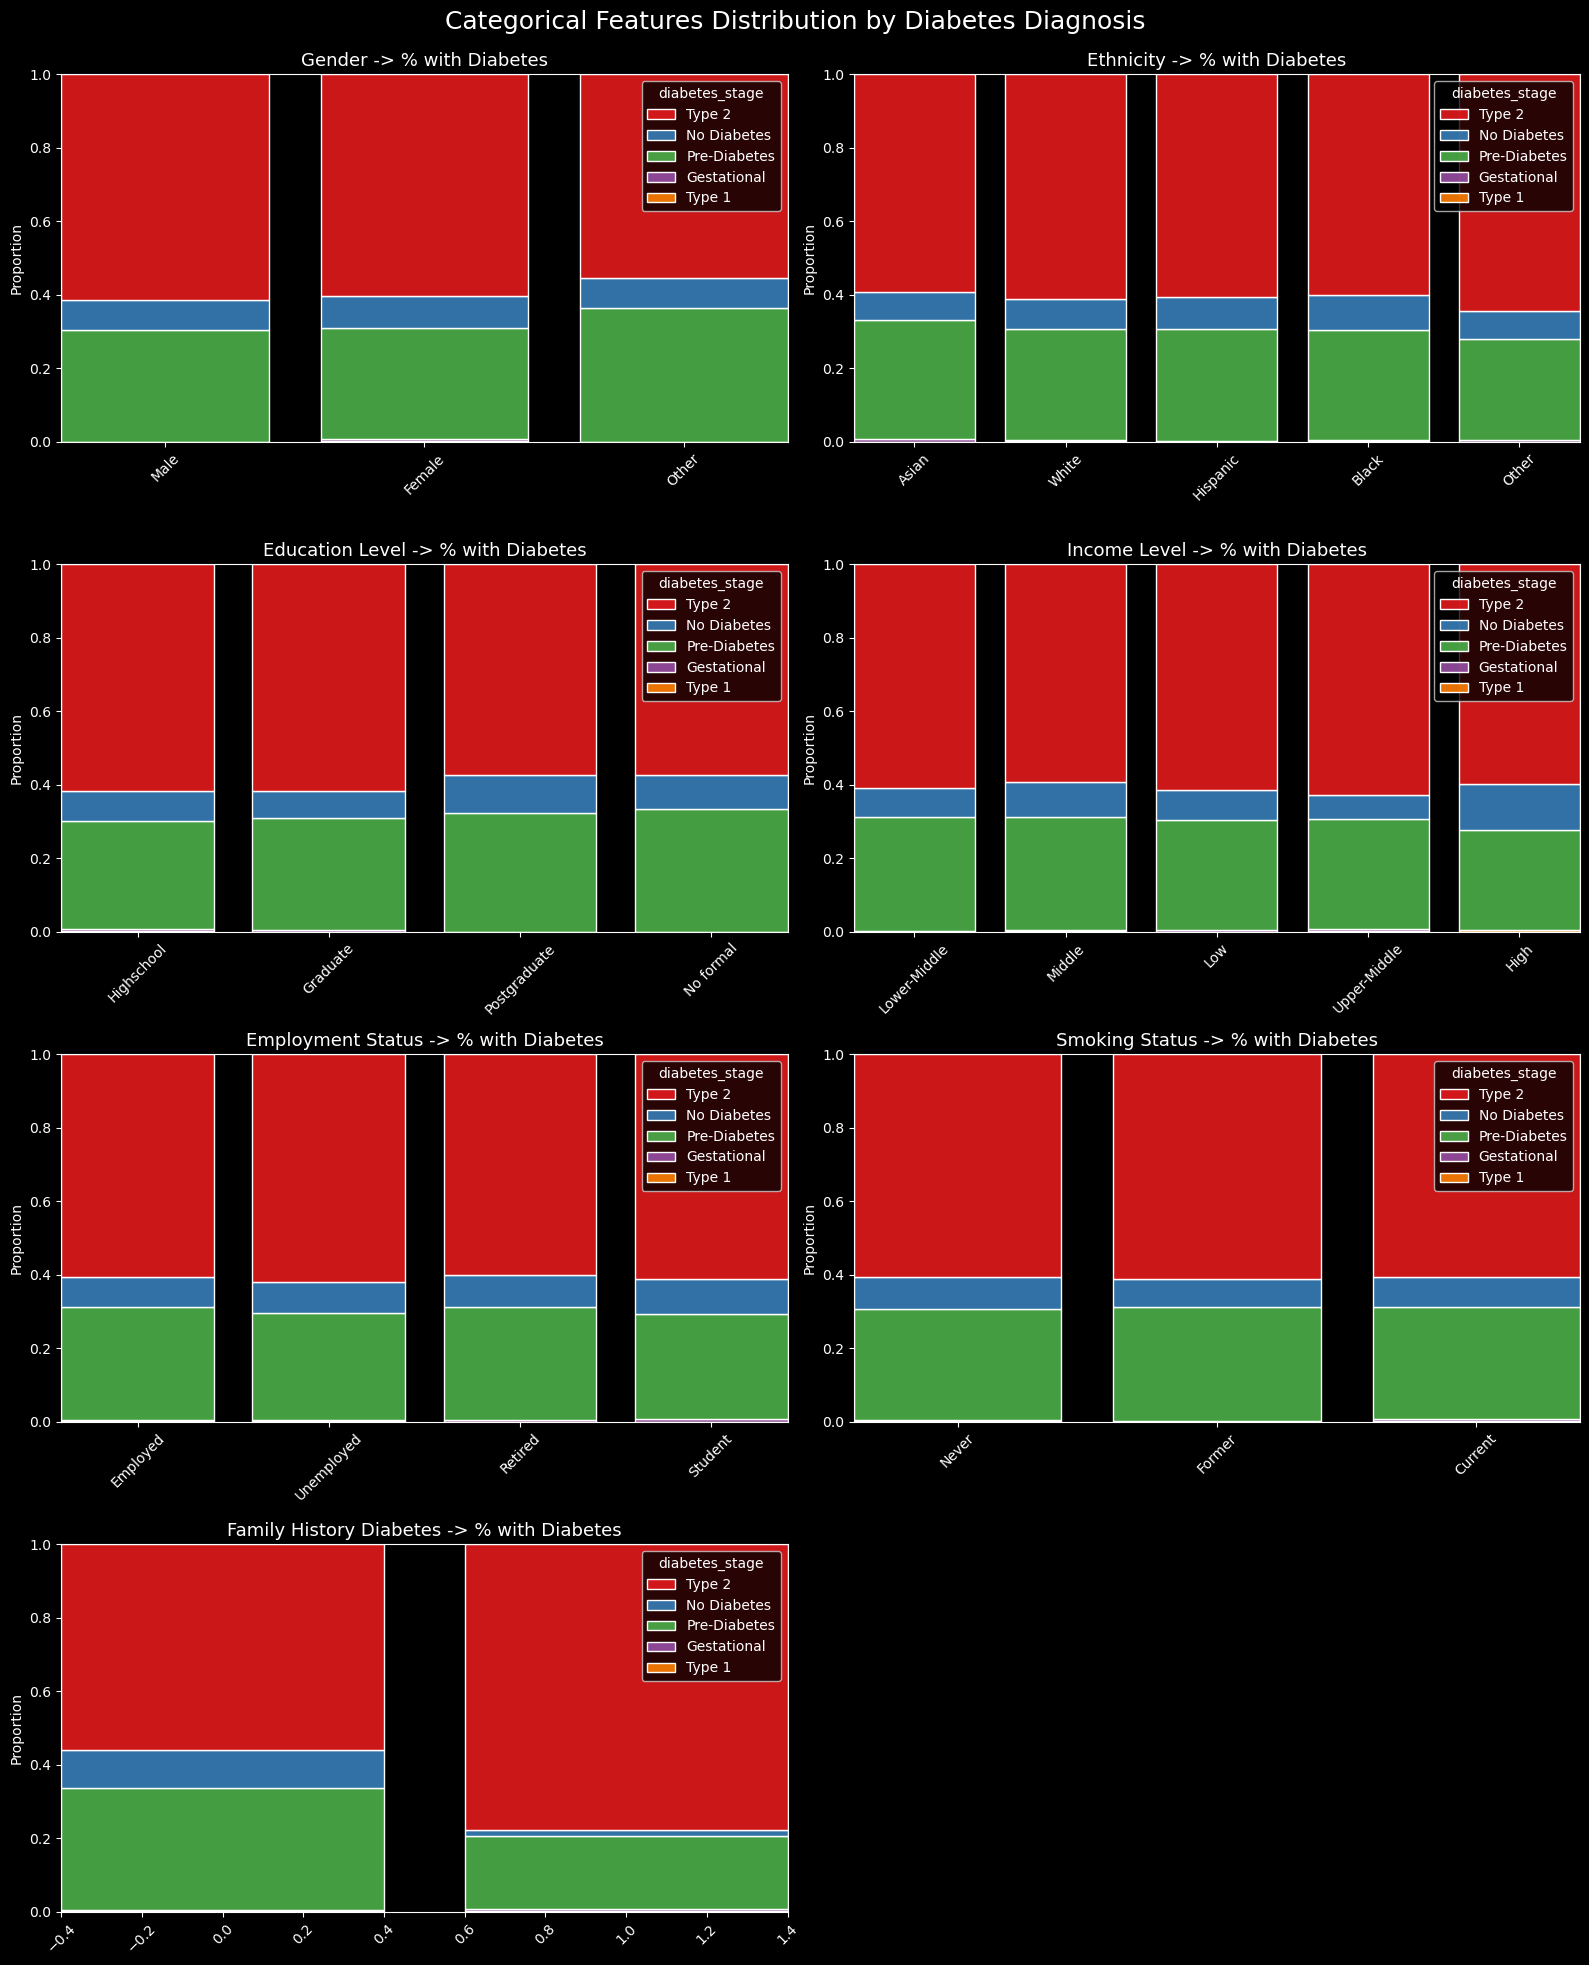

In [20]:
# We will see how some features differ for someone who is diagnosed with diabetes against some who is not
# We will separate out the relevant features first
relevant = ['gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status',
       'family_history_diabetes']
plt.figure(figsize=(16, 20))

for i, col in enumerate(relevant, 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=df, x=col, hue='diabetes_stage', stat='proportion', multiple='fill', shrink=0.8, palette='Set1',
                  discrete=True, alpha=0.9, legend=True)
    plt.title(f'{col.replace("_", " ").title()} -> % with Diabetes', 
              color='white', fontsize=13)
    plt.xlabel('')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)


plt.suptitle('Categorical Features Distribution by Diabetes Diagnosis\n', color='white', fontsize=18, y=0.98)
plt.tight_layout()
plt.show()

The above graphs show us that family history seems to be the only factor out of the categorical features, which can have maybe have some effect on whether a person has diabetes, factors like gender, ethnicity etc. are not highly relevant as we can see the percentage of people diagnosed with diabetes is relatively the same for each feature. We can discard the rest, but will not do it right now.

We will now move to see the relations between the numerical features and their effects.

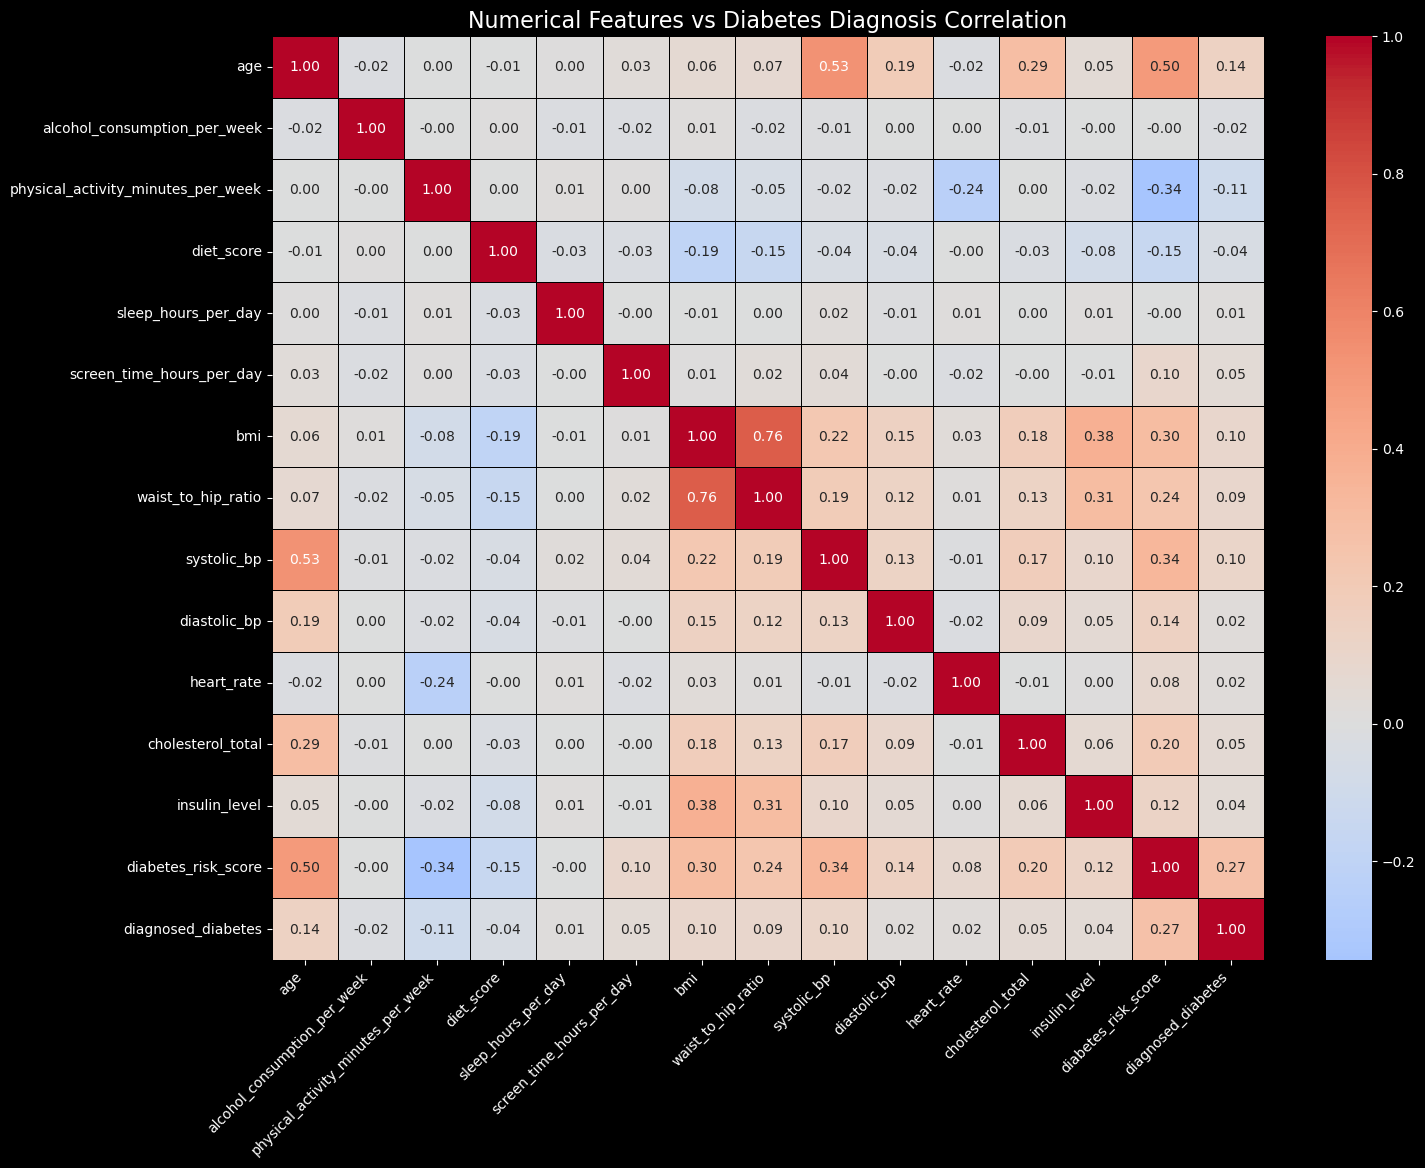

In [21]:
# We will use a correlation heatmap, we will be using the diagnosed_diabetes column too for this in addition to all the numerical columns
pltCols = numCols + ['diagnosed_diabetes']
correlation_matrix = df[pltCols].corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', annot_kws={"size": 10})
plt.title('Numerical Features vs Diabetes Diagnosis Correlation', color='white', fontsize=16)
plt.xticks(color='white', rotation=45, ha='right')
plt.yticks(color='white')
plt.show()

In [22]:
# We can also simply list the correlations with the diagnosed diabetes as for readibility
target_corr = correlation_matrix['diagnosed_diabetes'].sort_values(ascending=False).drop('diagnosed_diabetes')
print("Correlation with Diagnosed Diabetes:")
print(target_corr)

Correlation with Diagnosed Diabetes:
diabetes_risk_score                   0.268119
age                                   0.136696
systolic_bp                           0.104720
bmi                                   0.095692
waist_to_hip_ratio                    0.088910
cholesterol_total                     0.053539
screen_time_hours_per_day             0.045829
insulin_level                         0.043576
diastolic_bp                          0.023148
heart_rate                            0.018884
sleep_hours_per_day                   0.008625
alcohol_consumption_per_week         -0.022317
diet_score                           -0.044049
physical_activity_minutes_per_week   -0.105903
Name: diagnosed_diabetes, dtype: float64


### Module 2 Summary
We explored the data for visualization  
We first visualized how the distribution of the features looked like, which will help us later for model selection.
Numerical Features were looked at first, then Categorical, then we also looked at the categorical data divided on diabetes diagnonsis, which revealed low and high relevance features, then we moved to numerical data and their correlations, here is the summary of our findings:  

High Relevance: Family History, Age, BMI, Systolic BP  
Low Relevance: All of the other  

## Module 3: Modelling  
In this module, we will be building models to predict various features like, diabetes risk score, diagnosed diabetes, diabetes stage.  
We have 3 types of models to build:  

#### Binary Classification:   
Goal: Predict diganosed_diabetes.  
Models: Logistic Regression and Random Forest Classifier.  

#### Multiclass Classification:  
Goal: Predict diabetes_stage.  
Models: Radom Forest Classifier and Support Vector Classifier.  

#### Regression:  
Goal: Predict diabetes_risk_score.  
Models: Linear Regression and Random Forest Regressor

Before we can start building the models, we first need to import the required libraries, and also do preprocessing of the data, that I will explain as I do it in the code block comments.

In [23]:
# Import the libraries

# For pre-processing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# For building the models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC

# For evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Read the test dataset
test_df = pd.read_csv('Diabetes_test.csv')

In [24]:
# View the test dataset
test_df.head()
# Drop patient ID
test_df = test_df.drop(columns=['Patient ID'])
test_df.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'insulin_level',
       'diabetes_risk_score', 'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

In [25]:
# Define target variables and remove these from the original dataset to get the feature matrix, that is now represnted by X_train
targets = ['diagnosed_diabetes', 'diabetes_stage', 'diabetes_risk_score']
X_train = df.drop(columns=targets)

# Defining the three target variables for the training dataset
y_bin_train = df['diagnosed_diabetes']
y_multi_train = df['diabetes_stage']
y_reg_train = df['diabetes_risk_score']

# Define features and targets for testing dataset
X_test = test_df.drop(columns=targets)
y_bin_test = test_df['diagnosed_diabetes']
y_multi_test = test_df['diabetes_stage']
y_reg_test = test_df['diabetes_risk_score']

# Enusre the shapes match
print(X_train.shape)
print(X_test.shape)


(4957, 20)
(2000, 20)


In [26]:
numerical_training = ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score',
 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp',
  'heart_rate', 'cholesterol_total','insulin_level']
categorical_training = ['education_level', 'income_level', 'gender', 'ethnicity', 'employment_status',
 'smoking_status', 'family_history_diabetes']

# Create a pipeline to easily scale and transform the data so the model can learn effectively

# Scale the numeric variables since they all have drastically different values, this standardizes(Scales) them
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# This will use one-hot encoding on categorical variables to turn them into basically numericals so that the model can understand them
# as it doesnt really understand the text itself, this will basically create a vector with binary columns to represent each feature categories 
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Above we only defined how we want to do the transformations, now this will implement it, it will apply the numeric transformer on numeric variables
# and categorical transformer on categorical variables and drop the rest (since we already cleaned the data, dropped IDs etc, dont really need it but better to have)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_training),
        ('cat', categorical_transformer, categorical_training)
    ],
    remainder='drop'
)


With the pre-processing done and the columns properly trasnformed, we are ready to finally build and train the models

Logistic Regression Results
Average 5-Fold CV Accuracy: 0.5992 (+/- 0.0090)

================Testing================

Test Set Accuracy: 0.6065
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.66      0.57       778
           1       0.72      0.57      0.64      1222

    accuracy                           0.61      2000
   macro avg       0.61      0.62      0.60      2000
weighted avg       0.64      0.61      0.61      2000



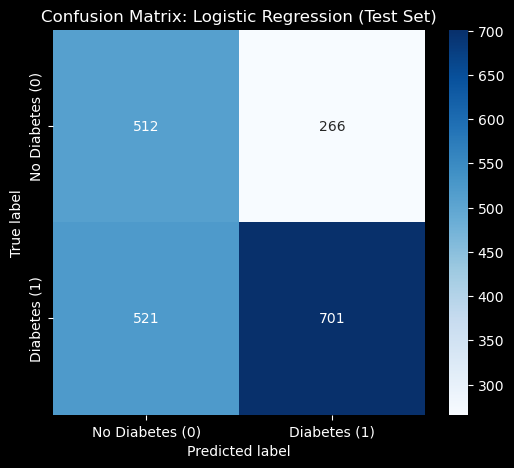

In [27]:
# Binary Classificiation

# Logistic Regression, building the model, using the above pipeline
# I am using random state 67 for the memes, haha, this can be any number, but it should be defined for reproducibality
log_reg = LogisticRegression(max_iter=1000, random_state=67, class_weight='balanced')  # I saw that since data was skewed, our model was heavily biased, thus using class_weight balanced
log_reg_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', log_reg)])

# 5-Fold Cross Validation
cv = KFold(n_splits=5, shuffle=True, random_state=67)
cv_scores = cross_val_score(log_reg_clf, X_train, y_bin_train, cv=cv, scoring='accuracy')

# Print the results of the cross-validation
print("Logistic Regression Results")
print(f"Average 5-Fold CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# Train and evaulate the model
log_reg_clf.fit(X_train, y_bin_train)
y_pred_log_reg = log_reg_clf.predict(X_test)
test_accuracy = accuracy_score(y_bin_test, y_pred_log_reg)

# Print the results
print("\n================Testing================\n")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_bin_test, y_pred_log_reg))

# 5. Visualize Confusion Matrix
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_bin_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Diabetes (0)', 'Diabetes (1)'], 
            yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.title('Confusion Matrix: Logistic Regression (Test Set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# I will interpret these results in module 4

The linear regression is enough, but I want the accuracy to be higher therefore will also be using the random forest classifier

Random Forest Classifier Results
Average 5-Fold CV Accuracy: 0.6310 (+/- 0.0256)

=========================Testing=========================

Test Set Accuracy: 0.6140
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.30      0.37       778
           1       0.65      0.82      0.72      1222

    accuracy                           0.61      2000
   macro avg       0.58      0.56      0.55      2000
weighted avg       0.59      0.61      0.59      2000



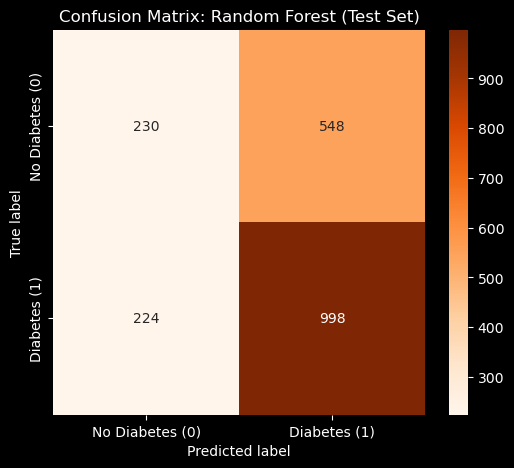

In [28]:
# Random Forest Classifier

# Define the model and the use the pre-defined pipeline
rf_clf_model = RandomForestClassifier(n_estimators=100, random_state=67) # I tested with class_weight= 'balanced' but it made the model worse so not using it here
rf_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_clf_model)])

# Can use the previous cross-validation data, but for scores need to use the new model
cv_scores_rf = cross_val_score(rf_clf, X_train, y_bin_train, cv=cv, scoring='accuracy')
print("Random Forest Classifier Results")
print(f"Average 5-Fold CV Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")

# Train and evaulate the model
rf_clf.fit(X_train, y_bin_train)
y_pred_rf = rf_clf.predict(X_test)
test_accuracy_rf = accuracy_score(y_bin_test, y_pred_rf)

# Print the results
print("\n=========================Testing=========================\n")
print(f"Test Set Accuracy: {test_accuracy_rf:.4f}")
print("Classification Report:")
print(classification_report(y_bin_test, y_pred_rf))

# Visualize the Confusion Matrix
plt.figure(figsize=(6,5))
cm_rf = confusion_matrix(y_bin_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Diabetes (0)', 'Diabetes (1)'],
            yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.title('Confusion Matrix: Random Forest (Test Set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Again, will interpret the results in module 4

The logisitc regression seems to be more accurate than the random forest classifier, which is interesting and I will discuss in module 4.  
Time to move on to the multiclass classifications, I will be first using the random forest classifier again.

Random Forest Classifier (Multiclass) Results:

Average 5-Fold CV Accuracy: 0.6010 (+/- 0.0168)

=========================Testing=========================

Test Set Accuracy: 0.6030

Classification Report:
              precision    recall  f1-score   support

 Gestational       0.00      0.00      0.00         4
 No Diabetes       0.00      0.00      0.00       143
Pre-Diabetes       0.41      0.11      0.18       635
      Type 1       0.00      0.00      0.00         1
      Type 2       0.62      0.93      0.75      1217

    accuracy                           0.60      2000
   macro avg       0.21      0.21      0.19      2000
weighted avg       0.51      0.60      0.51      2000



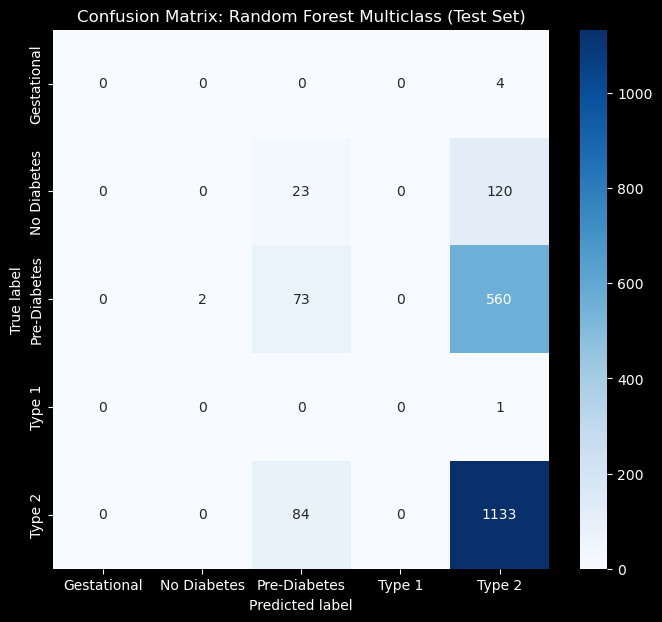

In [29]:
# Random Forest Classifier for Multiclass Classsification

# Define Model and Pipeline
rf_multi_model = RandomForestClassifier(n_estimators=100, random_state=67)
rf_multi_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rf_multi_model)])

print("Random Forest Classifier (Multiclass) Results:\n")

# Can use the previous cross-validation data, but for scores need to use the new model
cv_scores_rf = cross_val_score(rf_multi_clf, X_train, y_multi_train, cv=cv, scoring='accuracy')

print(f"Average 5-Fold CV Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")

# Train and Evaluate the model
rf_multi_clf.fit(X_train, y_multi_train)
y_pred_rf_multi = rf_multi_clf.predict(X_test)
test_accuracy_rf = accuracy_score(y_multi_test, y_pred_rf_multi)

# Print the results
print("\n=========================Testing=========================\n")
print(f"Test Set Accuracy: {test_accuracy_rf:.4f}")
print("\nClassification Report:")
class_labels = sorted(y_multi_train.unique())
print(classification_report(y_multi_test, y_pred_rf_multi, target_names=class_labels, zero_division=0))

# Visualize Confusion Matrix
plt.figure(figsize=(8,7))
cm_rf_multi = confusion_matrix(y_multi_test, y_pred_rf_multi, labels=class_labels)
sns.heatmap(cm_rf_multi, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix: Random Forest Multiclass (Test Set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Results will be discussed in module 4

Support Vector Classifier (SVC) Results
Average 5-Fold CV Accuracy: 0.4628 (+/- 0.0261)

=========================Testing=========================

Test Set Accuracy: 0.4640

Classification Report:
              precision    recall  f1-score   support

 Gestational       0.00      0.00      0.00         4
 No Diabetes       0.13      0.41      0.19       143
Pre-Diabetes       0.37      0.36      0.37       635
      Type 1       0.00      0.00      0.00         1
      Type 2       0.71      0.52      0.60      1217

    accuracy                           0.46      2000
   macro avg       0.24      0.26      0.23      2000
weighted avg       0.56      0.46      0.50      2000



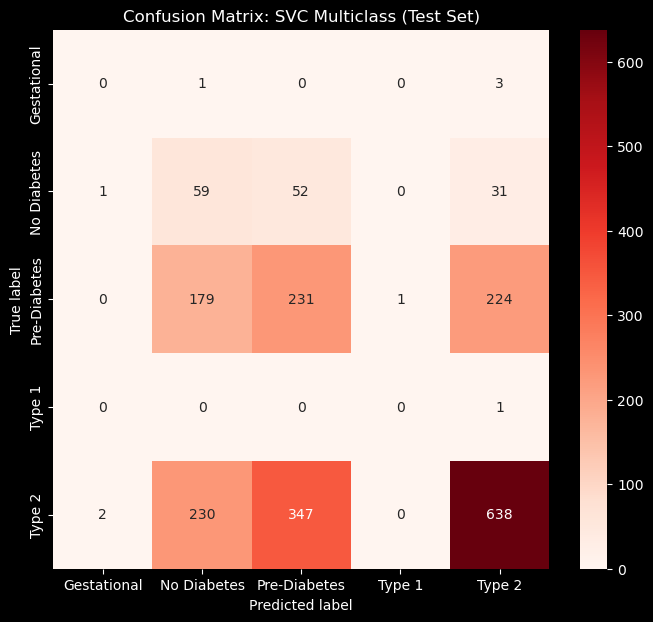

In [30]:
# Support Vector Classifier

# Define Model and Full Pipeline
svc_model = SVC(random_state=67, class_weight='balanced')
svc_multi_clf = Pipeline(steps=[('preprocessor', preprocessor), ('pca', PCA(n_components=20, random_state=67)) , ('classifier', svc_model)]) # Using PCA for dimension reduction

print("Support Vector Classifier (SVC) Results")

# 5-Fold Cross-Validation
cv_scores_svc = cross_val_score(svc_multi_clf, X_train, y_multi_train, cv=cv, scoring='accuracy')

print(f"Average 5-Fold CV Accuracy: {cv_scores_svc.mean():.4f} (+/- {cv_scores_svc.std()*2:.4f})")

# Train and Evaluate the Model
svc_multi_clf.fit(X_train, y_multi_train)
y_pred_svc_multi = svc_multi_clf.predict(X_test)
test_accuracy_svc = accuracy_score(y_multi_test, y_pred_svc_multi)

# Print the results
print("\n=========================Testing=========================\n")
print(f"Test Set Accuracy: {test_accuracy_svc:.4f}")
print("\nClassification Report:")
print(classification_report(y_multi_test, y_pred_svc_multi, target_names=class_labels, zero_division=0))

# Visualize Confusion Matrix
plt.figure(figsize=(8,7))
cm_svc_multi = confusion_matrix(y_multi_test, y_pred_svc_multi, labels=class_labels)
sns.heatmap(cm_svc_multi, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Confusion Matrix: SVC Multiclass (Test Set)')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Will discuss in module 4

SVC seems to be less accurate but it is able to classify other than type 1 and type 2 diabetes too unlike the random forest.  
We will now move onto the regression problem, for this we will simply be using linear regression and random forest regressor (for comparison)

In [31]:
# Regression

# Linear Regression

# Define the model and pipeline
lin_reg = LinearRegression()
lin_reg_clf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', lin_reg)])

# Train the model and use it for predictions
print("==========================Linear Regression==========================")
lin_reg_clf.fit(X_train, y_reg_train)
y_pred_lin_reg = lin_reg_clf.predict(X_test)

# 5-Fold Cross Validation
cv_scores_lr = cross_val_score(lin_reg_clf, X_train, y_reg_train, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_lr = np.sqrt(-cv_scores_lr)
cv_r2_lr = cross_val_score(lin_reg_clf, X_train, y_reg_train, cv=cv, scoring='r2')

print(f"Average 5-Fold CV RMSE: {cv_rmse_lr.mean():.4f} (+/- {cv_rmse_lr.std()*2:.4f})")
print(f"Average 5-Fold CV R2: {cv_r2_lr.mean():.4f} (+/- {cv_r2_lr.std()*2:.4f})")


# Evaluate the model
lin_reg_clf.fit(X_train, y_reg_train)
y_pred_lin_reg = lin_reg_clf.predict(X_test)

test_rmse_lr = np.sqrt(mean_squared_error(y_reg_test, y_pred_lin_reg))
test_r2_lr = r2_score(y_reg_test, y_pred_lin_reg)

# Print the result
print('\n===================Testing===================\n')
print(f"Test Set R-squared (R2): {test_r2_lr:.4f}")
print(f"Test Set RMSE: {test_rmse_lr:.4f}")

==========================Linear Regression==========================
Average 5-Fold CV RMSE: 1.2268 (+/- 0.0535)
Average 5-Fold CV R2: 0.9812 (+/- 0.0015)

===================Testing===================

Test Set R-squared (R2): 0.9802
Test Set RMSE: 1.2454


Our results are already extremely nice, and seem to accuratey predict the diabetes risk score, however, I will also use Random Forest Regressor for this prediction to compare

In [32]:
# Random Forest Regressor

# Define the model and pipeline
rf_reg = RandomForestRegressor(random_state=67) 
rf_reg_clf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', rf_reg)])

print("=====================Random Forest Regressor=====================")

# 5-Fold Cross Validation
cv_scores_rf = cross_val_score(rf_reg_clf, X_train, y_reg_train, cv=cv, scoring='neg_mean_squared_error')
cv_rmse_rf = np.sqrt(-cv_scores_rf)
cv_r2_rf = cross_val_score(rf_reg_clf, X_train, y_reg_train, cv=cv, scoring='r2')

print(f"Average 5-Fold CV RMSE: {cv_rmse_rf.mean():.4f} (+/- {cv_rmse_rf.std()*2:.4f})")
print(f"Average 5-Fold CV R2: {cv_r2_rf.mean():.4f} (+/- {cv_r2_rf.std()*2:.4f})")

# Test the model
rf_reg_clf.fit(X_train, y_reg_train)
y_pred_rf_reg = rf_reg_clf.predict(X_test)

test_rmse_rf = np.sqrt(mean_squared_error(y_reg_test, y_pred_rf_reg))
test_r2_rf = r2_score(y_reg_test, y_pred_rf_reg)

# Print the result
print('\n===================Testing===================\n')
print(f"Test Set R-squared (R2): {test_r2_rf:.4f}")
print(f"Test Set RMSE: {test_rmse_rf:.4f}")

=====================Random Forest Regressor=====================
Average 5-Fold CV RMSE: 1.6657 (+/- 0.0428)
Average 5-Fold CV R2: 0.9654 (+/- 0.0017)

===================Testing===================

Test Set R-squared (R2): 0.9689
Test Set RMSE: 1.5592


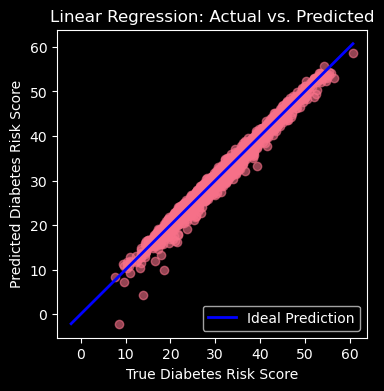

In [33]:
plt.figure(figsize=(4, 4))
plt.scatter(y_reg_test, y_pred_lin_reg, alpha=0.6)
max_val = max(y_reg_test.max(), y_pred_lin_reg.max())
min_val = min(y_reg_test.min(), y_pred_lin_reg.min())
plt.plot([min_val, max_val], [min_val, max_val], 'b', lw=2, label='Ideal Prediction')
plt.xlabel('True Diabetes Risk Score')
plt.ylabel('Predicted Diabetes Risk Score')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend(loc='lower right')
plt.show()

## Module 4
Here we will be summarizing everything we did and giving our conclusions.

### Module 1 Summary (Data Cleaning)
Loaded the dataset  
The dataset had 5000 records, each with 24 columns (23 properties).  
Found 8 null values and removed them, leaving us with 4992 records.  
Found 35 outliers using IQR method, removed the outliers which were lesser than Q1 - 2.5 * IQR or greater than Q3 + 2.5 * IQR, leaving us with 4957 unique records.  
Found Typos in the dataset which were fixed by repalcing them with contextual understanding.  
We dropped the patient ids column as it was irrelevant.


### Module 2 Summary (Data Visualization)
We explored the data for visualization  
We first visualized how the distribution of the features looked like, which will help us later for model selection.
Numerical Features were looked at first, then Categorical, then we also looked at the categorical data divided on diabetes diagnonsis, which revealed low and high relevance features, then we moved to numerical data and their correlations, here is the summary of our findings:  

High Relevance: Family History, Age, BMI, Systolic BP  
Low Relevance: All of the other  


### Module 3 Summary (Modelling)
We imported the various modules for building the models, preprocessing the data, evaluation of the models.  
In preprocessing of the data we separtated out the features and used column transformers, the numerical variables were scaled using the standard scaler and the categorical variabels were transformed using One-Hot encoding, this was all done separately then combined using a Pipeline() for consistency.

#### For Binary Classification:     
Goal: Predict diganosed_diabetes.  
Models Tested: Logistic Regression and Random Forest Classifier.  

The accuracy of Logistic Regression model was 59.95% on the 5-Fold Cross Validation Set, and 60.65% on Unseen test data, which showed that the model is consistent and avoided overfitting, we also created a confusion matrix which showed that its recall on test data was 0.66, and 0.57 for patients without and people with diabetes respectively, which means it was correctly labelling the data.

The accuracy of the Random Forest Classifier was 63.10% on the 5-Fold Cross Validation Set, and 61.40% on Unseen test data, which showed that the model is consistent and avoided overfitting, we also created a confusion matrix which showed that its recall on test data was 0.30, and 0.82 for patients without and people with diabetes respectively, which shows that it was biased towards predicting patients with diabetes.

Even though the accuracy of the Random Forest Classifier is higher, but its confusion matrix reveals its not the better choice due to its higher bias towards predicting diabetes. Therefore we will choose the Logistic Regression Model for any predictions.  


#### Multiclass Classification:  
Goal: Predict diabetes_stage.  
Models Tested: Radom Forest Classifier and Support Vector Classifier (SVC).  

The accuracy of the Random Forest Classifier was 60.10% on the 5-Fold Cross Validation Set, and 60.30% on Unseen test data, which showed that the model is consistent and avoided overfitting. However, the classification report showed a recall of 0.93 for the majority class ('Type 2' diabetes) but failed to identify most other stages, achieving a recall of 0.00 for 'No Diabetes', 'Gestational', and 'Type 1', and only 0.11 for 'Pre-Diabetes'. This pattern highlights an extreme bias towards predicting patients with Type 2 diabetes.

For SVC we used Principal Component Analysis (PCA) for dimension reduction because one-hot encoding introduced a large number of dimensions, which can often hinder the performance of Support Vector Machines. The accuracy of the Support Vector Classifier was 46.28% on the 5-Fold Cross Validation Set, and 46.40% on Unseen test data, showing consistency. Crucially, its classification report showed a more balanced performance: while the recall for the majority 'Type 2' class was lower (0.52), the model was significantly better at identifying minority stages, achieving a recall of 0.41 for 'No Diabetes' and 0.36 for 'Pre-Diabetes'.

Even though the accuracy of the Random Forest Classifier is substantially higher (60.30% vs 46.40%), its confusion matrix reveals a severe and unacceptable bias that renders it useless for the clinical goal of early detection. The SVC Model, despite its lower overall accuracy, exhibits a far more balanced and clinically useful recall profile across all stages. Therefore, we will choose the Support Vector Classifier (SVC) Model for any subsequent predictions, as its superior ability to detect minority and early-stage patients makes it the better choice for the goal of early intervention.

#### Regression:  
Goal: Predict diabetes_risk_score.  
Models Tested: Linear Regression and Random Forest Regressor

The Linear Regression model achieved exceptional performance, with an average 5-Fold Cross Validation R-squared (R2) of 0.9812 and an Unseen test R2 of 0.9802. The Root Mean Squared Error (RMSE) was very low at 1.2454 on the test set. The close agreement between the CV and test scores shows the model is highly consistent and has successfully avoided overfitting.

The Random Forest Regressor also showed strong performance, with an average 5-Fold CV R2 of 0.9654 and a test R2 of 0.9689. Its test RMSE was slightly higher at 1.5592. The consistency between CV and test results also confirms that this model is robust.

The fact that both models achieved an R2 over 0.96 is a strong indicator that the diabetes_risk_score is likely calculated using a simple, linear formula based on the input features. The Linear Regression model is the clear winner here, as it achieved higher accuracy (higher R2 and lower RMSE) with a far simpler and more interpretable model. For predicting the continuous diabetes_risk_score, we will use the Linear Regression Model.



